## Máquinas de Soporte Vectorial (Support Vector Machines, SVM): Explicación y Formalismo

Las **máquinas de soporte vectorial (SVM)** son un modelo supervisado utilizado tanto para clasificación como para regresión, especialmente eficaz en problemas de clasificación binaria. Su objetivo es encontrar un **hiperplano óptimo** que separe las clases de manera que la distancia entre los puntos más cercanos de cada clase al hiperplano (margen) sea máxima, mejorando así la generalización del modelo.

### 1. Concepto Básico

La SVM busca un **hiperplano** que separe los puntos de diferentes clases en el espacio de características. En un problema de clasificación lineal, el hiperplano se define como una línea en 2D o un plano en 3D que maximiza la separación entre las dos clases. Esta separación o **margen máximo** permite que el modelo sea robusto ante nuevas muestras y minimice el riesgo de error.

### 2. Formalismo Matemático

Dado un conjunto de datos con \( n \) puntos \( (x_i, y_i) \), donde \( x_i \) es un punto de características y \( y_i \) su clase (normalmente \( y_i = \pm 1 \)), el objetivo de una SVM es encontrar un hiperplano definido por el vector normal \( w \) y el término de sesgo \( b \) que maximice el margen. El hiperplano cumple la siguiente ecuación:

$$
w \cdot x + b = 0
$$

Para maximizar el margen, las SVM requieren resolver el siguiente problema de optimización, minimizando \( \| w \|^2 / 2 \) sujeto a la restricción de que todos los puntos queden correctamente clasificados:

$$
y_i (w \cdot x_i + b) \geq 1, \; \forall i
$$

Este problema se convierte en una optimización cuadrática que puede resolverse mediante el **método del multiplicador de Lagrange**, con el objetivo de encontrar el mejor \( w \) y \( b \) que maximicen el margen y cumplan las restricciones de clasificación.

### 3. Formalismo Computacional

Desde una perspectiva computacional, la SVM resuelve la optimización cuadrática utilizando algoritmos de programación convexa, los cuales son eficientes para encontrar la solución óptima del hiperplano. En la práctica:

1. **Vector de Soporte**: Durante el entrenamiento, solo algunos puntos son críticos para definir el margen máximo; estos puntos se llaman **vectores de soporte** y determinan la posición del hiperplano.
  
2. **Función de Kernel**: En problemas donde los datos no son separables linealmente, las SVM emplean funciones de kernel, como el **kernel radial (RBF)** o el **kernel polinomial**, que transforman los datos a un espacio de mayor dimensión donde sí sean linealmente separables.

3. **Solución Computacional**: Los algoritmos SVM utilizan métodos como el **algoritmo SMO (Sequential Minimal Optimization)** para resolver problemas de gran tamaño al dividir la optimización en subproblemas más pequeños, permitiendo su ejecución en paralelo para mejorar la eficiencia.

### 4. Función de Kernel: Expansión a Problemas No Lineales

Para problemas no lineales, las SVM utilizan la **técnica del kernel**, que proyecta los datos a un espacio de mayor dimensión donde sí pueden separarse linealmente. La función de kernel $$ K(x_i, x_j) $$ calcula el producto interno en el espacio proyectado sin necesidad de realizar la transformación explícita, lo que reduce el costo computacional. Los kernels más comunes incluyen:

- **Kernel Lineal**: $$ K(x_i, x_j) = x_i \cdot x_j $$
- **Kernel Polinomial**: $$ K(x_i, x_j) = (x_i \cdot x_j + 1)^d $$
- **Kernel RBF (Radial Basis Function)**: $$ K(x_i, x_j) = \exp(-\gamma \| x_i - x_j \|^2) $$

### 5. Ventajas y Desventajas de las SVM

**Ventajas**:
- **Eficiencia**: Son efectivos en espacios de alta dimensionalidad y se adaptan bien a problemas linealmente separables.
- **Robustez**: Gracias al uso de vectores de soporte y el margen máximo, las SVM son robustas ante el sobreajuste, especialmente cuando el número de características supera el de muestras.
- **Flexibilidad con Kernels**: La técnica de kernel permite que las SVM se apliquen a problemas no lineales de forma eficaz.

**Desventajas**:
- **Costo Computacional**: Entrenar una SVM puede ser lento en conjuntos de datos grandes, debido a la necesidad de resolver un problema de optimización cuadrática.
- **Sensibilidad a Parámetros**: El desempeño de las SVM depende en gran medida de la elección del kernel y de parámetros como \( C \) y \( \gamma \), que deben ajustarse cuidadosamente.

### 6. Implementación en Python

A continuación, mostramos cómo implementar una SVM con `scikit-learn` en Python para un problema de clasificación binaria.


In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos
data = datasets.load_iris()
X = data.data[data.target != 2]
y = data.target[data.target != 2]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar la SVM con un kernel lineal
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

# Realizar predicciones y evaluar
y_pred = model.predict(X_test)
print(f"Precisión del modelo SVM: {accuracy_score(y_test, y_pred):.4f}")

Precisión del modelo SVM: 1.0000


# Clasificación con Maquinas de soporte Vectorial

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn import preprocessing

In [3]:
#Apertura de archivo csv a un dataframe de pandas

#revisar la ruta para tu caso particular
ruta = "/content/Social_Network_Ads.csv"
dataset = pd.read_csv(ruta)
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [4]:
#Sacar las variables independientes
X = dataset.iloc[:,[2,3]].values

# Sacar la variable dependientes
y = dataset.iloc[:,4].values

In [5]:
X.shape

(400, 2)

In [6]:
#Division de Datos - entrenamiento y validacion

#herramienta para dividir los datos
from sklearn.model_selection import train_test_split

#divide los datos en 20% para la validacion y se colocar una semilla para hacer la division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
# Escalado de Variables - Estandarizacion y Normalizacion

#Es preferible utilizalo en algortimos que usan el calculo de distancia - pitagoras

#Estandarizacion
sc_X = preprocessing.StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Kernel Lineal

In [8]:
from sklearn.svm import SVC
#Ajuste del clasificdor con Maquinas de soporte vectorial

clasificador = SVC(kernel="linear", random_state=0)
clasificador.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [9]:
#Prediccion de los resultados con el conjusto de testing

y_pre = clasificador.predict(X_test)
#respuesta del modelo
print(y_pre)
#Valores dados por los datos de testing
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [10]:
#Comprobacion del resultado - Matriz de confucion
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pre)
cm

array([[57,  1],
       [ 6, 16]])

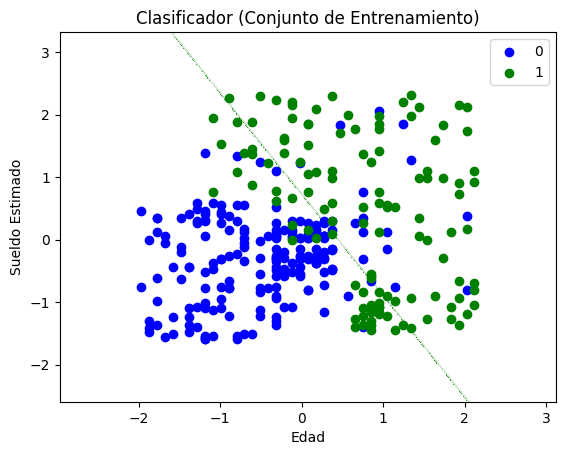

In [18]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Generar predicciones sobre la cuadrícula
predicciones = clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Usar contourf para la frontera de decisión
plt.contourf(X1, X2, predicciones, alpha=0.75, colors=['white', 'green'])  # Pasar colores directamente
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Colores para las clases en el conjunto de entrenamiento
colors = ['blue', 'green']

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=colors[i], label=j)

plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

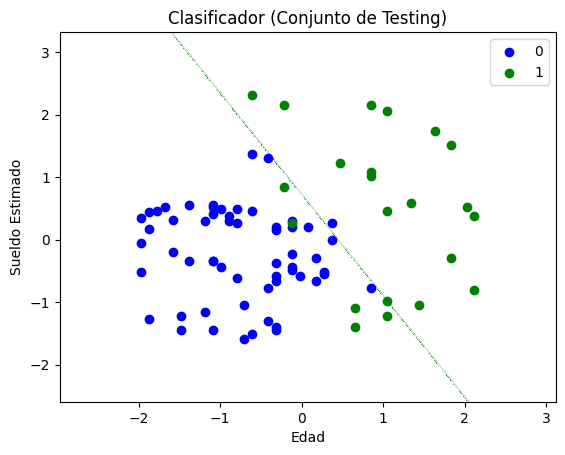

In [21]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Testing
X_set, y_set = X_test, y_test  # Utilizar el conjunto de prueba en lugar del de entrenamiento
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Generar predicciones sobre la cuadrícula
predicciones = clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Usar contourf para la frontera de decisión
plt.contourf(X1, X2, predicciones, alpha=0.75, colors=['white', 'green'])  # Pasar colores directamente
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Colores para las clases en el conjunto de prueba
colors = ['blue', 'green']

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=colors[i], label=j)

plt.title('Clasificador (Conjunto de Testing)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

## Kernel Polinómico


In [22]:
from sklearn.svm import SVC
#Ajuste del clasificdor con Maquinas de soporte vectorial

clasificador = SVC(kernel="poly", random_state=0, degree=3 )
clasificador.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [23]:
#Prediccion de los resultados con el conjusto de testing

y_pre = clasificador.predict(X_test)
#respuesta del modelo
print(y_pre)
#Valores dados por los datos de testing
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [24]:
#Comprobacion del resultado - Matriz de confucion
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pre)
cm

array([[58,  0],
       [ 7, 15]])

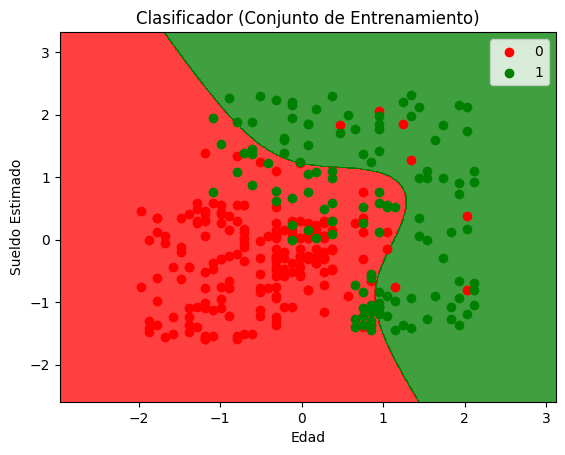

In [26]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Generar predicciones sobre la cuadrícula
predicciones = clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Usar contourf para la frontera de decisión con colores predefinidos
plt.contourf(X1, X2, predicciones, alpha=0.75, cmap=ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Colores para las clases en el conjunto de entrenamiento
colores = ['red', 'green']

# Graficar puntos de datos
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=colores[i], label=j)  # Pasar color directamente desde la lista

plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

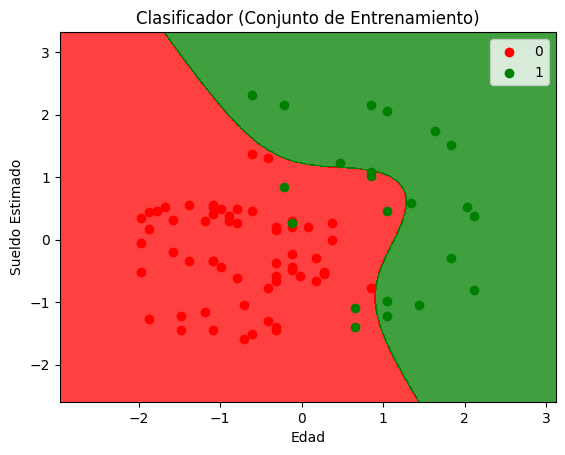

In [27]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Generar predicciones sobre la cuadrícula
predicciones = clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Usar contourf para la frontera de decisión con colores predefinidos
plt.contourf(X1, X2, predicciones, alpha=0.75, cmap=ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Colores para las clases en el conjunto de entrenamiento
colores = ['red', 'green']

# Graficar puntos de datos
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=colores[i], label=j)  # Pasar color directamente desde la lista

plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

## Kernel Gaussiano

In [42]:
from sklearn.svm import SVC
#Ajuste del clasificdor con Maquinas de soporte vectorial

clasificador = SVC(kernel="rbf", random_state=0, degree=4, gamma = 'scale')
clasificador.fit(X_train, y_train)

SVC(degree=4, random_state=0)

In [43]:
#Prediccion de los resultados con el conjusto de testing

y_pre = clasificador.predict(X_test)
#respuesta del modelo
print(y_pre)
#Valores dados por los datos de testing
print(y_test)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [44]:
#Comprobacion del resultado - Matriz de confucion
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pre)
cm

array([[55,  3],
       [ 1, 21]])

<ipython-input-21-a0d8a887bb3f>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


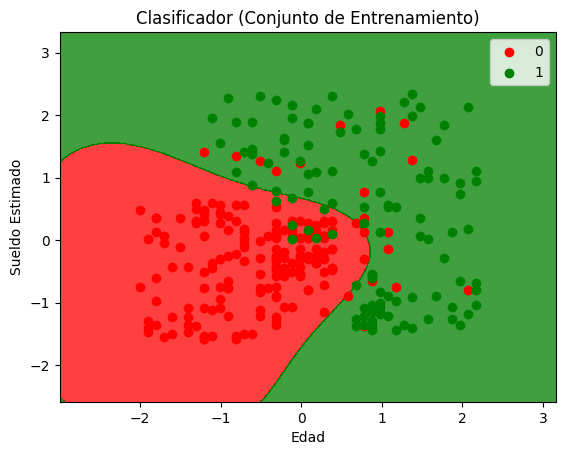

In [ ]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

<ipython-input-22-d8810f7526b2>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


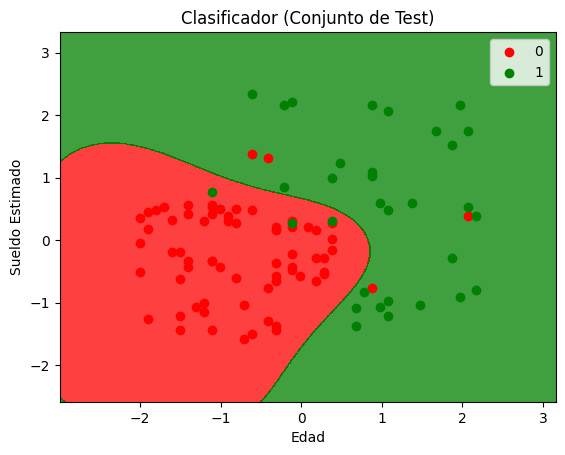

In [ ]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Testing
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Test)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

---
# SVM

Las máquinas de vectores soporte (SVM) son un conjunto de métodos de aprendizaje supervisado utilizados para __clasificación__, __regresión__ y detección de valores atípicos.

Empecemos con un ejemplo de clasificación y veamos los argumentos del clasificador [SVM Classifier Doc](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

- **C:** Parámetro de regularización (fijado por defecto en 1.0). La fuerza de la regularización es inversamente proporcional a C. Debe ser estrictamente positivo.

- **kernel:** Especifica el tipo de kernel que se utilizará en el algoritmo. `linear` usará un kernel lineal simple, `rbf` (por defecto) aplicará el truco de kernel visto en las diapositivas de teoría. Otros kernels no cubiertos en la teoría también están disponibles y puedes crear tu propio kernel y usarlo aquí también.

- gamma:** Valor del hiperparámetro usado sólo con los núcleos `rbf`, `poly` y `sigmoid`. Se establece por defecto a `«scale»` que utiliza la siguiente fórmula 1 / (n_características * X.var()) como valor de gamma. si `gamma=«auto»`, utiliza 1 / n_características. También puede pasar un valor gamma personalizado como float, `gamma=0.1` también se considera un buen valor por defecto.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [46]:
!gdown "1r7ZqEH9kqsoNGW3hFumWetLUoTMMbLiq"
dataset = pd.read_csv('data_SVM.csv')
dataset.head()

Downloading...
From: https://drive.google.com/uc?id=1r7ZqEH9kqsoNGW3hFumWetLUoTMMbLiq
To: /content/data_SVM.csv
100% 10.9k/10.9k [00:00<00:00, 26.3MB/s]


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [47]:
dataset["Purchased"].value_counts()

,count
Purchased,
0,257
1,143


Utilizaremos como características `Age` y `EstimatedSalary`. Nuestro objetivo de predicción será «Comprado».


In [48]:
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, -1].values

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

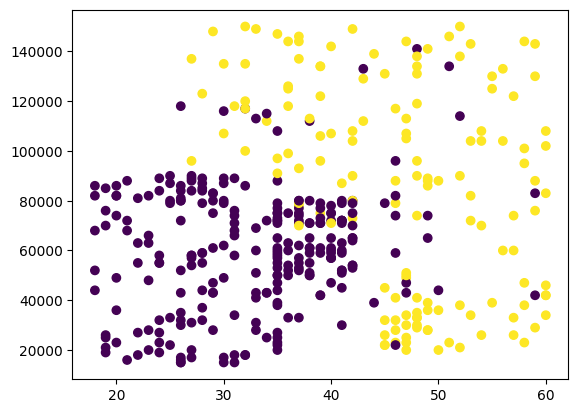

In [50]:
plt.scatter(X[:, 0], X[:, 1], c=Y)

In [51]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [55]:
from sklearn.svm import SVC

classifier = SVC(C=1, kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1, random_state=0)

In [56]:
# Ahora es el momento de utilizar nuestro modelo entrenado en muestras no vistas
y_pred = classifier.predict(X_test)

In [57]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [58]:
# Usando esta fórmula podemos medir el % de muestras correctamente clasificadas
# Veremos más adelante mejores formas de medir el rendimiento de nuestro clasificador
accuracy = sum(y_pred == y_test) / len(y_pred)
print(f"Accuracy: {100 * accuracy:.2f}%")

Accuracy: 95.00%


In [59]:
# Comprobemos la precisión en el conjunto de entrenamiento
y_pred_train = classifier.predict(X_train)
accuracy = sum(y_pred_train == y_train) / len(y_pred_train)
print(f"Accuracy: {100 * accuracy:.2f}%")

Accuracy: 90.31%


In [60]:
from sklearn.svm import SVC

classifier = SVC(C=1, kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [61]:
# Ahora es el momento de utilizar nuestro modelo entrenado en muestras no vistas
y_pred = classifier.predict(X_test)

In [62]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [63]:
# Usando esta fórmula podemos medir el % de muestras correctamente clasificadas
# Veremos más adelante mejores formas de medir el rendimiento de nuestro clasificador
accuracy = sum(y_pred == y_test) / len(y_pred)
print(f"Accuracy: {100 * accuracy:.2f}%")

Accuracy: 91.25%


In [64]:
# Comprobemos la precisión en el conjunto de entrenamiento
y_pred_train = classifier.predict(X_train)
accuracy = sum(y_pred_train == y_train) / len(y_pred_train)
print(f"Accuracy: {100 * accuracy:.2f}%")

Accuracy: 82.19%


In [65]:
from sklearn.svm import SVC

classifier = SVC(C=1, kernel='poly', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1, kernel='poly', random_state=0)

In [66]:
# Ahora es el momento de utilizar nuestro modelo entrenado en muestras no vistas
y_pred = classifier.predict(X_test)

In [67]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [68]:
# Usando esta fórmula podemos medir el % de muestras correctamente clasificadas
# Veremos más adelante mejores formas de medir el rendimiento de nuestro clasificador
accuracy = sum(y_pred == y_test) / len(y_pred)
print(f"Accuracy: {100 * accuracy:.2f}%")

Accuracy: 91.25%


In [69]:
# Comprobemos la precisión en el conjunto de entrenamiento
y_pred_train = classifier.predict(X_train)
accuracy = sum(y_pred_train == y_train) / len(y_pred_train)
print(f"Accuracy: {100 * accuracy:.2f}%")

Accuracy: 82.81%


**Consejo avanzado:** Puede utilizar el siguiente código para analizar más a fondo cómo nuestro modelo SVM con Kernel Gaussiano está clasificando sus datos. Este fragmento mostrará los límites de decisión del modelo.


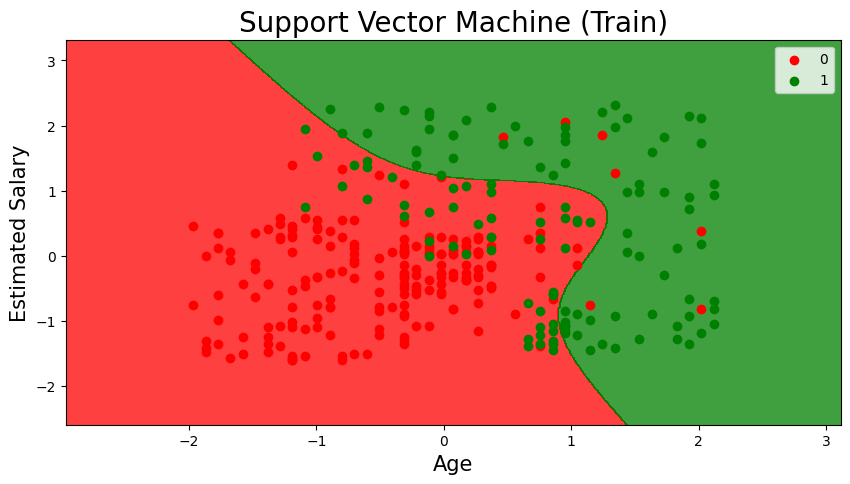

In [71]:
from matplotlib.colors import ListedColormap

# Definir conjunto de entrenamiento
X_Set, Y_Set = X_train, y_train

# Crear una cuadrícula para el gráfico de contorno
X1, X2 = np.meshgrid(
    np.arange(start=X_Set[:, 0].min() - 1, stop=X_Set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_Set[:, 1].min() - 1, stop=X_Set[:, 1].max() + 1, step=0.01)
)

# Configurar la figura
plt.figure(figsize=(10, 5))

# Graficar el contorno de decisión
plt.contourf(
    X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(['red', 'green'])  # Definir el mapa de colores
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Colores para las clases
colors = ['red', 'green']

# Graficar los puntos de datos
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(
        X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
        color=colors[i], label=j
    )

# Configurar el título y las etiquetas
plt.title('Support Vector Machine (Train)', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Estimated Salary', fontsize=15)
plt.legend()
plt.show()

<ipython-input-36-f1f0488dc9e4>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


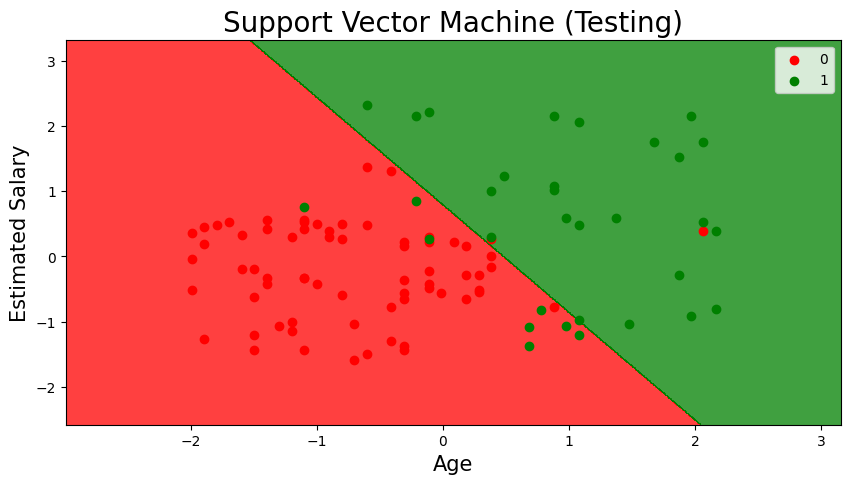

In [ ]:
X_Set, Y_Set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_Set[:, 0].min()-1, stop=X_Set[:, 0].max()+1, step=0.01),
    np.arange(start=X_Set[:, 1].min()-1, stop=X_Set[:, 1].max()+1, step=0.01))

plt.figure(figsize=(10,5))
plt.contourf(
    X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(['red', 'green'])
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(
        X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
        c=ListedColormap(('red', 'green'))(i), label=j
    )

plt.title('Support Vector Machine (Testing)', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Estimated Salary', fontsize=15)
plt.legend()
plt.show()

---
## Referencias

- [Scikit-learn: Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html#svm)
- [Datacamp: Support Vector Machines with Scikit-learn Tutorial](https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python)
